In [1]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

fatal: destination path 'Artificial-Intelligence-with-Python' already exists and is not an empty directory.


Задание 1

In [8]:
#Проверить правильность - вроде верно
import random

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes 
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator 
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 45

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=500)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.9, 0.5

    # Define the number of generations
    num_generations = 300
    
    print('\nStarting the evolution process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    print('\nEvaluated', len(population), 'individuals')
    
    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print('Evaluated', len(invalid_ind), 'individuals')
        
        # The population is entirely replaced by the offspring
        population[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]
        
        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =', 
                round(std, 2))
    
    print("\n==== End of evolution")
    
    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))


C:\Users\sholo\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



Starting the evolution process

Evaluated 500 individuals

===== Generation 0
Evaluated 486 individuals
Min = 16.0 , Max = 34.0
Average = 25.09 , Standard deviation = 2.77

===== Generation 1
Evaluated 477 individuals
Min = 20.0 , Max = 34.0
Average = 27.28 , Standard deviation = 2.52

===== Generation 2
Evaluated 475 individuals
Min = 21.0 , Max = 39.0
Average = 29.08 , Standard deviation = 2.54

===== Generation 3
Evaluated 474 individuals
Min = 22.0 , Max = 38.0
Average = 30.68 , Standard deviation = 2.45

===== Generation 4
Evaluated 472 individuals
Min = 24.0 , Max = 40.0
Average = 32.41 , Standard deviation = 2.41

===== Generation 5
Evaluated 483 individuals
Min = 24.0 , Max = 41.0
Average = 33.9 , Standard deviation = 2.56

===== Generation 6
Evaluated 467 individuals
Min = 27.0 , Max = 42.0
Average = 35.28 , Standard deviation = 2.37

===== Generation 7
Evaluated 468 individuals
Min = 29.0 , Max = 42.0
Average = 36.5 , Standard deviation = 2.09

===== Generation 8
Evaluated 4

In [9]:
#Результат первой лабораторной работы
print(best_ind)
print(len(best_ind))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
45


Аппроксимация функции Растрыгина

gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	250.543	196.583	659.389	1869.02
2  	200  	273.081	199.455	683.641	1770.65
3  	200  	215.326	111.298	503.933	1579.3 
4  	200  	133.046	149.47 	373.124	790.899
5  	200  	75.4405	131.117	274.092	585.433
6  	200  	61.2622	91.7121	232.624	426.666
7  	200  	49.8303	88.8185	201.117	373.543
8  	200  	39.9533	85.0531	178.645	326.209
9  	200  	31.3781	87.4824	159.211	261.132
10 	200  	31.3488	54.0743	144.561	274.877
11 	200  	30.8796	63.6032	136.791	240.739
12 	200  	24.1975	70.4913	125.691	190.684
13 	200  	21.2274	50.6409	122.293	177.483
14 	200  	25.4931	67.9873	124.132	199.296
15 	200  	26.9804	46.3411	119.295	205.331
16 	200  	24.8993	56.0033	115.614	176.702
17 	200  	21.9789	61.4999	113.417	170.156
18 	200  	21.2823	50.2455	112.419	190.677
19 	200  	22.5016	48.153 	111.543	166.2  
20 	200  	21.1602	32.1864	106.044	171.899
21 	200  	23.3864	52.8601	107.301	163.617
22 	200  	23.1008	51.1226	109.628	18

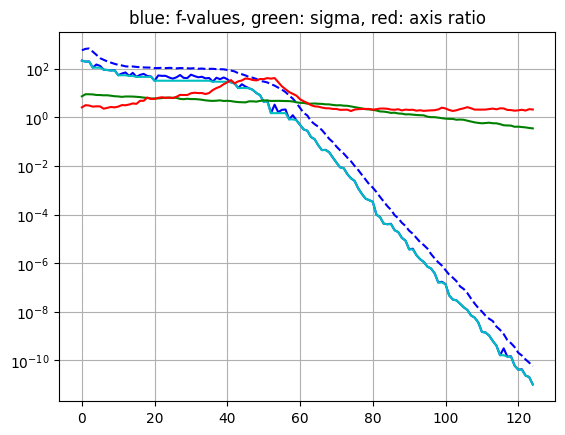

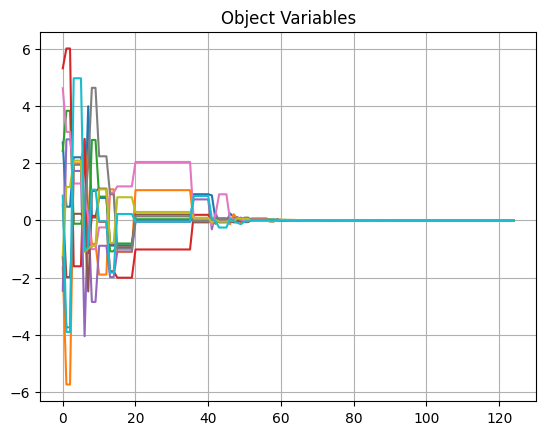

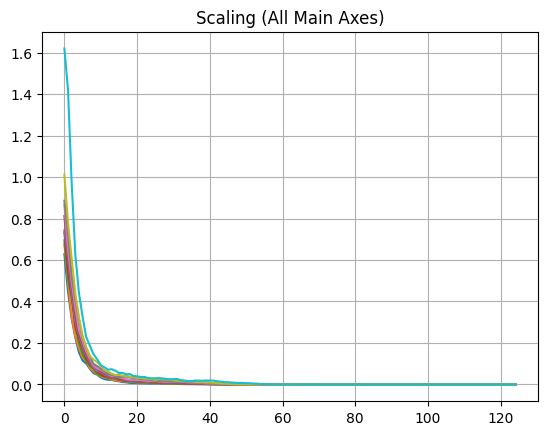

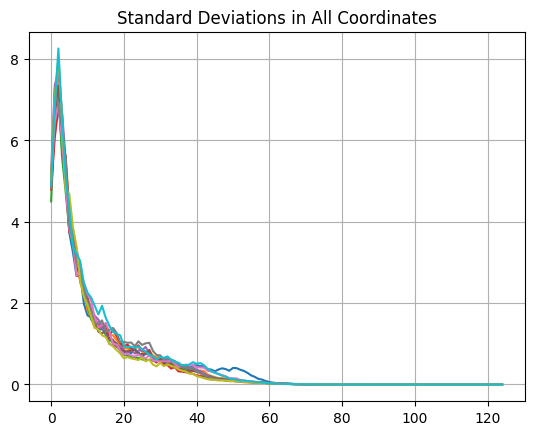

In [10]:
#аппроксимация функции Растрыгина
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125
    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0, 
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Update the strategy with the evaluated individuals
        toolbox.update(population)
        
        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)
        
        print(logbook.stream)
        
        # Save more data along the evolution 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")
    
    plt.show()



In [11]:
hall_of_fame[0]

[-4.666632212364162e-08,
 -6.818818747743305e-08,
 -4.165322120540069e-08,
 -7.466623109774956e-09,
 -8.04620619326427e-08,
 -1.2925311056136606e-07,
 -1.0608115315956683e-07,
 -8.821409016410773e-08,
 -1.4941758466614276e-08,
 -1.3051056336781355e-08]

Графическое изображение функции Растрыгина

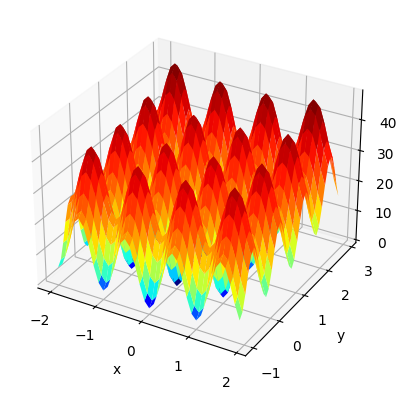

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
try:
    import numpy as np
except:
    exit()
from deap import benchmarks
def rosenbrock_arg0(sol):
    return benchmarks.rastrigin(sol)[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(rosenbrock_arg0, zip(X.flat,Y.flat)), dtype=float, count=X.shape[0]*X.shape[1]).reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Графическое представление функции Розенброка

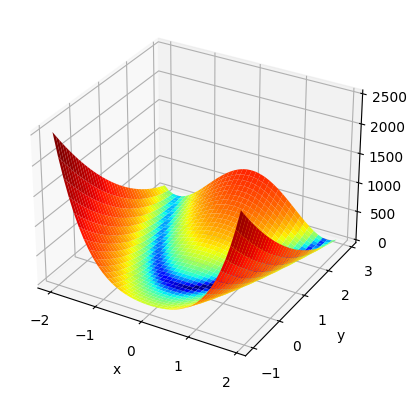

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
try:
    import numpy as np
except:
    exit()
from deap import benchmarks
def rosenbrock_arg0(sol):
    return benchmarks.rosenbrock(sol)[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(rosenbrock_arg0, zip(X.flat,Y.flat)), dtype=float, count=X.shape[0]*X.shape[1]).reshape(X.shape)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Аппроксимация функции Розенброка

gen	evals	std        	min        	avg        	max        
0  	200  	1.83489e+08	2.78996e+06	1.54919e+08	1.42519e+09
1  	200  	1.03932e+08	1.71786e+06	1.18086e+08	6.38764e+08
2  	200  	6.53053e+07	2.50496e+06	6.22636e+07	3.61779e+08
3  	200  	2.87769e+07	236397     	3.1482e+07 	1.23671e+08
4  	200  	1.55442e+07	196058     	1.39131e+07	9.43245e+07
5  	200  	4.99729e+06	277510     	5.39897e+06	2.84052e+07
6  	200  	2.27998e+06	104288     	2.41048e+06	1.5281e+07 
7  	200  	1.17268e+06	69566.4    	1.27792e+06	8.62289e+06
8  	200  	693901     	13594.4    	614660     	5.85878e+06
9  	200  	280148     	7151.84    	296947     	1.41553e+06
10 	200  	152618     	1151.26    	132191     	1.2705e+06 
11 	200  	92125.7    	3518.3     	73963.8    	812446     
12 	200  	40731.6    	1053.69    	36665.4    	262485     
13 	200  	17205.5    	1025.2     	18354.6    	132305     
14 	200  	12587.9    	823.24     	14410.3    	71500.1    
15 	200  	10120      	695.42     	11054.1    	56671      
16 	200  	4375

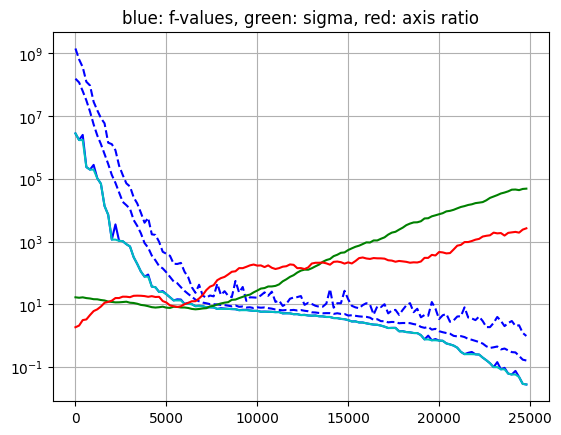

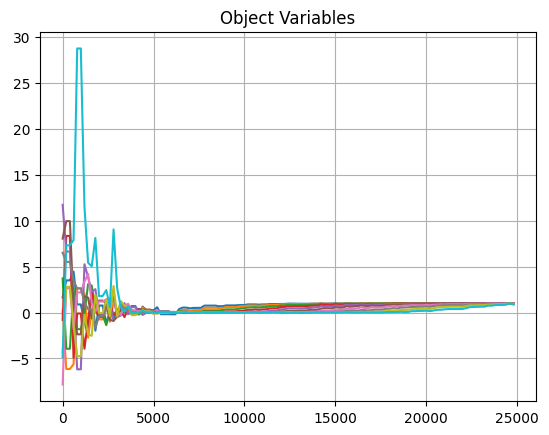

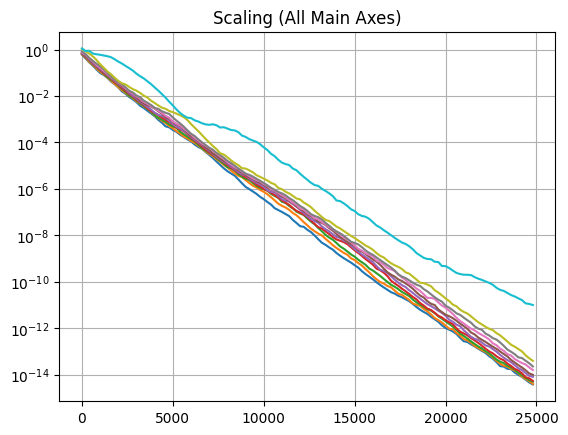

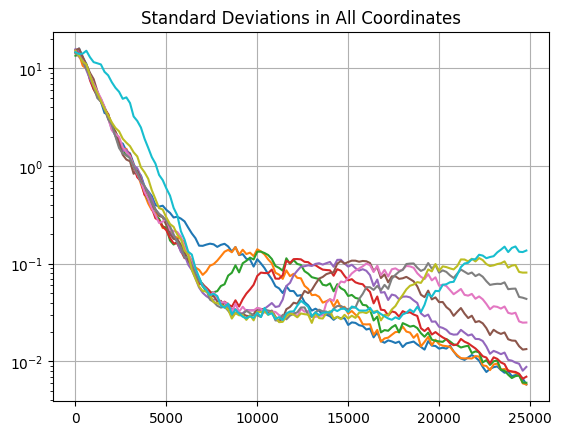

In [13]:
#Экстремум функции Розенброка
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rosenbrock)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=15.0,
            lambda_=20*num_individuals, mu=int(20*num_individuals / 2))

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Update the strategy with the evaluated individuals
        toolbox.update(population)
        
        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)
        
        print(logbook.stream)
        
        # Save more data along the evolution 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")
    
    plt.show()



In [55]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(point) - (2*math.sin(3*point + math.pi/4) + 1))**2 for point in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.tan, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-100,100)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=200) 
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.8
    num_generations = 150
    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)



C:\Users\sholo\anaconda3\lib\site-packages\deap\gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
C:\Users\sholo\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\sholo\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max   	min    	nevals	std    	avg  	gen	max	min	nevals	std    
0  	200   	3030.52	0  	571703	2.00305	200   	40316.6	3.785	0  	7  	2  	200   	1.67892
1  	184   	216.871	1  	27796.2	2.00304	184   	1981.9 	4.385	1  	13 	1  	184   	2.51928
2  	172   	4206.85	2  	571703 	2.00304	172   	42186.6	5.19 	2  	19 	1  	172   	3.27015
3  	179   	67.8153	3  	2076.76	2.00304	179   	292.51 	5.645	3  	17 	1  	179   	3.49127
4  	176   	35.9288	4  	2175.95	1.99106	176   	211.058	6.76 	4  	20 	1  	176   	4.2181 
5  	179   	578.402	5  	92105.6	1.96163	179   	6533.77	7.795	5  	27 	1  	179   	5.63232
6  	178   	118.119	6  	19465.6	1.96163	178   	1378.62	9.35 	6  	30 	1  	178   	5.99729
7  	174   	36.2206	7  	2085.24	1.96163	174   	250.39 	11.28	7  	34 	1  	174   	6.75882
8  	1

In [56]:
hall_of_fame[0]

In [57]:
gp.graph(hall_of_fame[0])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [(0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (4, 6),
  (3, 7),
  (7, 8),
  (7, 9),
  (1, 10)],
 {0: 'cos',
  1: 'add',
  2: 'cos',
  3: 'sub',
  4: 'add',
  5: 'x',
  6: 'x',
  7: 'mul',
  8: 'x',
  9: -1,
  10: -1})

Количество ребер:  10
Количество вершин:  11


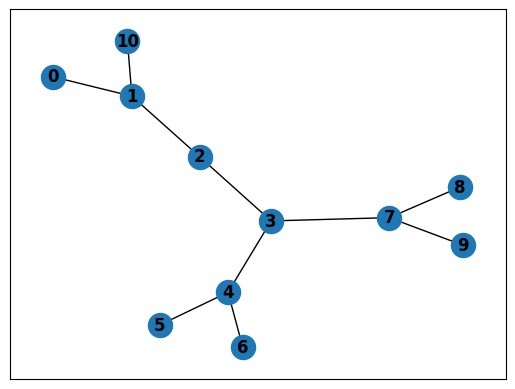

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw_networkx(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


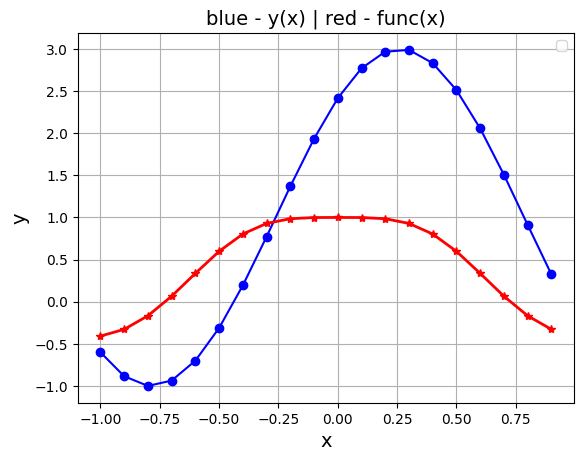

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

best_individual = hall_of_fame[0]
best_function = toolbox.compile(best_individual)

data = {'x': [], 'y': []}
for i in np.arange(-1.0, 1.0, 0.1):
    x = round(i, 2)
    y = (2*math.sin(3*x + math.pi/4) + 1)
    data['x'].append(x)
    data['y'].append(y)

points = {'x': [], 'y': []}
for i in np.arange(-1.0, 1.0, 0.1):
    x1 = round(i, 2)
    y1 = best_function(x1)
    points['x'].append(x1)
    points['y'].append(y1)

df1 = pd.DataFrame(data)
df = pd.DataFrame(points)

plt.plot(df1['x'], df1['y'], color='blue', marker='o')
plt.plot(df['x'], df['y'], color='red', marker='*', linewidth=2)
plt.title('blue - y(x) | red - func(x)', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


AttributeError: 'tuple' object has no attribute 'size'

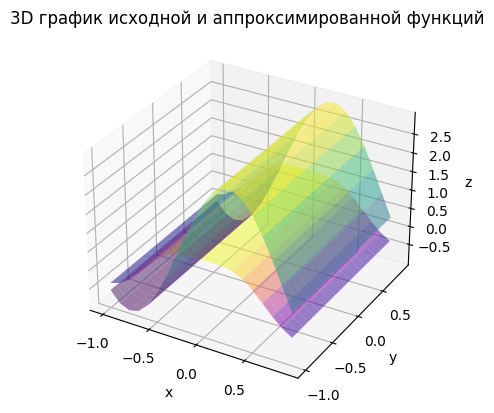

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

best_individual = hall_of_fame[0]
best_function = toolbox.compile(best_individual)

# Создание сетки значений x и y
x = np.arange(-1.0, 1.0, 0.1)
y = np.arange(-1.0, 1.0, 0.1)
X, Y = np.meshgrid(x, y)

# Вычисление значений исходной функции и аппроксимации на сетке
Z_true = 2*np.sin(3*X + np.pi/4) + 1
Z_pred = np.array([[best_function(x) for x in row] for row in X])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение исходной функции
ax.plot_surface(X, Y, Z_true, cmap='viridis', alpha=0.5, label='True Function')

# Построение аппроксимации функции
ax.plot_surface(X, Y, Z_pred, cmap='plasma', alpha=0.5, label='Predicted Function')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D график исходной и аппроксимированной функций')

plt.legend()
plt.show()


In [62]:
hall_of_fame[0]

In [63]:
gp.graph(hall_of_fame[0])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [(0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (4, 6),
  (3, 7),
  (7, 8),
  (7, 9),
  (1, 10)],
 {0: 'cos',
  1: 'add',
  2: 'cos',
  3: 'sub',
  4: 'add',
  5: 'x',
  6: 'x',
  7: 'mul',
  8: 'x',
  9: -1,
  10: -1})

In [64]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)


cos(add(cos(sub(add(x, x), mul(x, -1))), -1))


Количество ребер:  10
Количество вершин:  11


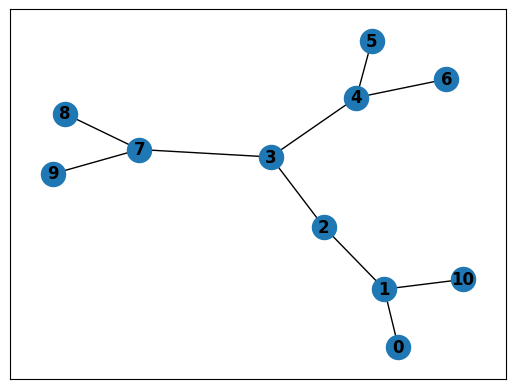

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw_networkx(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

In [30]:
#Аппроксимация многих переменных 
import pandas as pd
import numpy as np

step = 5e-2

X1_values = np.arange(-0.5, 0.5 + step, step)
X2_values = X1_values.copy()

X1, X2 = np.meshgrid(X1_values, X2_values)

Y = np.sin(X1) + np.cos(X2)

X1_flat = X1.flatten()
X2_flat = X2.flatten()
Y_flat = Y.flatten()

df = pd.DataFrame({'X1': X1_flat, 'X2': X2_flat, 'Y': Y_flat})
data = df.to_dict(orient='list')
N_variables = 2
import operator
import math
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 10000000
    return numerator / denominator

def add_one(x):
    return 1

# Define the evaluation function
def eval_func(individual, points):
    func = toolbox.compile(expr=individual)
    mae = 0  

    for _, row in points.iterrows():

        inputs = [row[f'X{i}'] for i in range(1, N_variables + 1)]
        prediction = func(*inputs) 
        target = row['Y'] 
        mae += abs(prediction - target)  
    mae /= len(points)

    return mae,

# Function to create the toolbox
def create_toolbox(df):
    pset = gp.PrimitiveSet("MAIN", N_variables)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(add_one, 1)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
    pset.renameArguments(ARG0='X1', ARG1='X2')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=df)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox
random.seed(7)

toolbox = create_toolbox(df)

population = toolbox.population(n=100)
hall_of_fame = tools.HallOfFame(1)

stats_fit = tools.Statistics(lambda x: x.fitness.values)
stats_size = tools.Statistics(len)

mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

# Define parameters
probab_crossover = 0.4
probab_mutate = 0.2
num_generations = 5

population, log = algorithms.eaSimple(population, toolbox,
    probab_crossover, probab_mutate, num_generations,
    stats=mstats, halloffame=hall_of_fame, verbose=True)


C:\Users\sholo\anaconda3\lib\site-packages\deap\gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
C:\Users\sholo\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\sholo\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                                  fitness                                  	                      size                     
   	      	---------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max        	min      	nevals	std        	avg 	gen	max	min	nevals	std    
0  	100   	1.83967e+27	0  	1.83967e+29	0.0452091	100   	1.83045e+28	3.37	0  	7  	2  	100   	1.39753
1  	61    	2.71061e+12	1  	2.31743e+14	0.0452091	61    	2.33487e+13	3.12	1  	7  	1  	61    	1.48513
2  	51    	3.2627e+12 	2  	2.31743e+14	0.0463998	51    	2.48145e+13	3.04	2  	9  	1  	51    	1.74883
3  	56    	0.350754   	3  	1.95479    	0.0463998	56    	0.293902   	3.08	3  	8  	1  	56    	1.63511
4  	51    	4.28914e+12	4  	4.28914e+14	0.0463998	51    	4.26764e+13	3.01	4  	9  	1  	51    	1.5264 
5  	50    	5.45522e+12	5  	4.28914e+14	0.0463998	50    	4.41122e+13	3.09	5  	13 	1  	50    	2.13586


Количество ребер:  5
Количество вершин:  6


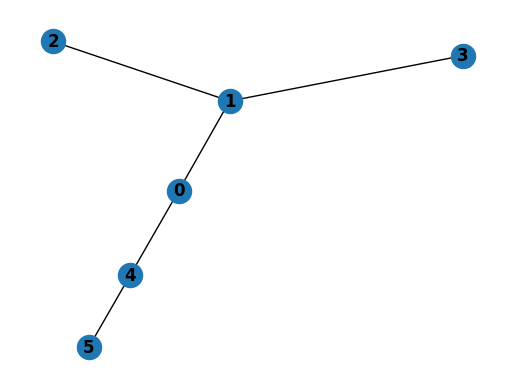

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
    nodes, edges, labels = gp.graph(hall_of_fame)
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    print("Количество ребер: ", len(edges))
    print("Количество вершин: ", len(nodes))

    # Создаем объект осей для отрисовки графа
    fig, ax = plt.subplots()
    
    # Рисуем граф и отображаем его
    nx.draw(g, with_labels=True, font_weight='bold', ax=ax)
    plt.show()

draw_graph(hall_of_fame[0])


In [32]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)
func = toolbox.compile(expr=best_individual)

new_series_values = []

for index, row in df.iterrows():
    l = [row["X" + str(i)] for i in range(1, N_variables + 1)]
    result = func(*l)  # Example calculation
    new_series_values.append(result)

df["prediction"] = new_series_values
df['AE'] = abs(df["Y"] - df["prediction"])

add(division_operator(X1, X1), sin(X1))


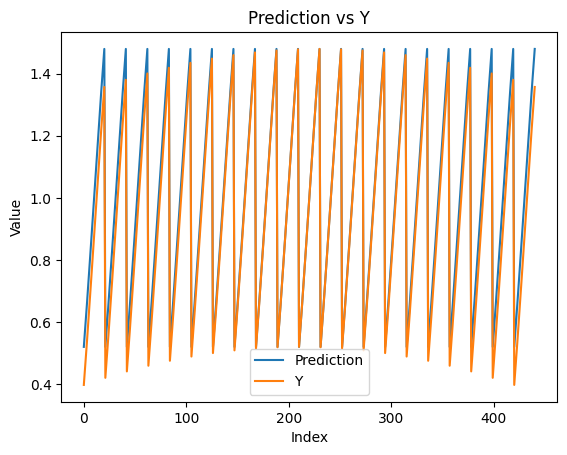

In [33]:
import matplotlib.pyplot as plt

plt.plot(df.index, df["prediction"], label="Prediction")

plt.plot(df.index, df["Y"], label="Y")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Prediction vs Y")

plt.legend()

plt.show()

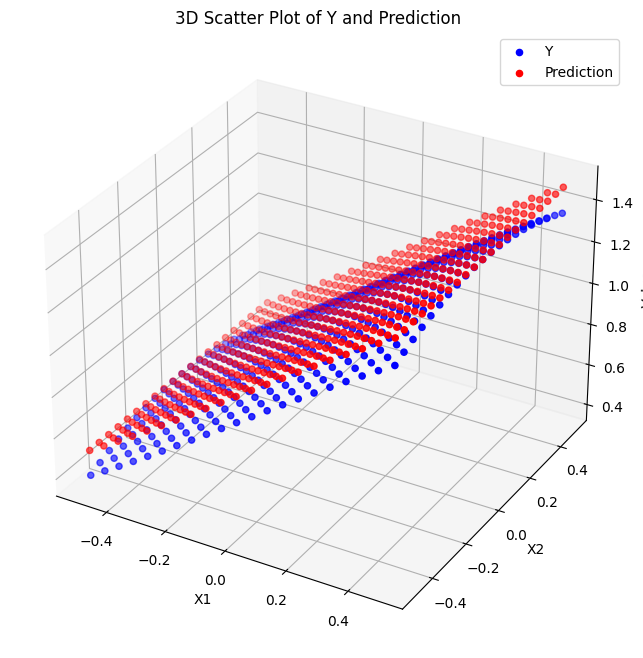

In [34]:
#3d график
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Y
ax.scatter(df['X1'], df['X2'], df['Y'], c='blue', label='Y')

# Scatter plot for prediction
ax.scatter(df['X1'], df['X2'], df['prediction'], c='red', label='Prediction')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('3D Scatter Plot of Y and Prediction')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Робот

In [321]:
#робот
import copy
import random
from functools import partial

import numpy as np
from deap import algorithms, base, creator, tools, gp

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.moves_done = []

        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]
    
    def _reset(self):
        self.row = self.row_start 
        self.col = self.col_start 
        self.direction = 1
        self.moves = 0  
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.moves_done = []

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self): 
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
            self.moves_done.append("turn left")

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1    
            self.direction = (self.direction + 1) % 4
            self.moves_done.append("turn right")
        
    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col

            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1

            self.matrix_exc[self.row][self.col] = "passed"
            self.moves_done.append("move_forward")

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col        
        return self.matrix_exc[ahead_row][ahead_col] == "target"
   
    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)
   
    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()
    
    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())

            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")

                elif col == ".":
                    self.matrix[-1].append("empty")

                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1

        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2): 
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):     
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset

    # Transform the tree expression to functionnal Python code
    routine = gp.compile(individual, pset)

    # Run the generated routine
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset

    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Attribute generator
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    return toolbox

if __name__ == "__main__":
    global robot

    # Seed the random number generator
    random.seed(7)

    # Define the maximum number of moves
    max_moves = 2500

    # Create the robot object
    robot = RobotController(max_moves)

    # Create the toolbox
    toolbox = create_toolbox()
    
    # Read the map data
    with open ('target_map.txt', 'r') as f:
        robot.traverse_map(f)
    
    # Define population and hall of fame variables
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)

    # Register the stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.865
    probab_mutate = 0.24
    num_generations = 50
    
    # Run the algorithm to solve the problem
    algorithms.eaSimple(population, toolbox, probab_crossover, 
            probab_mutate, num_generations, stats, 
            halloffame=hall_of_fame)



gen	nevals	avg  	std    	min	max
0  	400   	1.515	4.49275	0  	62 
1  	355   	4.4475	10.1241	0  	90 
2  	372   	7.8675	15.0531	0  	96 
3  	370   	11.345	19.2384	0  	96 
4  	358   	20.85 	27.0968	0  	111
5  	359   	30.3675	35.0056	0  	111
6  	365   	34.6875	39.1111	0  	121
7  	365   	39.9075	42.7119	0  	123
8  	363   	51.105 	46.585 	0  	123
9  	360   	54.5925	48.3774	0  	123
10 	360   	52.52  	50.2651	0  	123
11 	363   	54.33  	50.7606	0  	123
12 	367   	57.6875	51.8593	0  	124
13 	347   	57.58  	52.9955	0  	124
14 	366   	52.73  	53.8741	0  	124
15 	350   	57.9825	54.05  	0  	124
16 	357   	56.9775	54.4351	0  	124
17 	367   	58.5725	54.6287	0  	124
18 	356   	59.9625	55.5543	0  	124
19 	362   	57.6425	54.834 	0  	124
20 	350   	62.795 	54.3089	0  	124
21 	371   	54.6475	55.67  	0  	124
22 	337   	73.885 	55.6661	0  	124
23 	351   	68.0075	55.8749	0  	124
24 	357   	70.045 	55.4982	0  	124
25 	364   	66.1525	56.0286	0  	124
26 	347   	76.63  	55.1599	0  	124
27 	358   	74.7325	56.4253	0

In [7]:
#алгоритм элитизма
from deap import tools
from deap.algorithms import varAnd


def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма
    """

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Начало процесса генерации
    for gen in range(1, ngen + 1):
        # Выбор следующего поколения
        offspring = toolbox.select(population, len(population) - hof_size)

        # Вариативность особей
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Оценка особей
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Обновление зала славы
        if halloffame is not None:
            halloffame.update(offspring)

        # Замена текущей популяции потомками
        population[:] = offspring

        # Добавление статистики
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook


gen	nevals	min    	avg    
0  	50    	0.68043	1.02209
1  	44    	0.68043	0.962851
2  	44    	0.68043	0.90973 
3  	44    	0.68043	0.849988
4  	41    	0.621854	0.793804
5  	46    	0.621854	0.744989
6  	42    	0.598216	0.705726
7  	44    	0.528636	0.692958
8  	38    	0.528636	0.663297
9  	43    	0.528636	0.636599
10 	45    	0.512313	0.602118
11 	42    	0.480472	0.574828
12 	45    	0.475568	0.572413
13 	44    	0.475568	0.557726
14 	44    	0.475568	0.545523
15 	44    	0.462382	0.533289
16 	44    	0.458127	0.521469
17 	40    	0.458127	0.521417
18 	46    	0.44677 	0.519408
19 	45    	0.445181	0.503845
20 	45    	0.445181	0.510778
21 	44    	0.445181	0.504084
22 	44    	0.430136	0.497604
23 	46    	0.414768	0.482669
24 	42    	0.414768	0.489128
25 	42    	0.414768	0.48274 
26 	45    	0.414768	0.491522
27 	44    	0.414768	0.481194
28 	42    	0.413064	0.472647
29 	45    	0.403969	0.473157
30 	39    	0.400841	0.479788
31 	37    	0.380208	0.451102
32 	37    	0.380208	0.44909 
33 	46    	0.374522	0

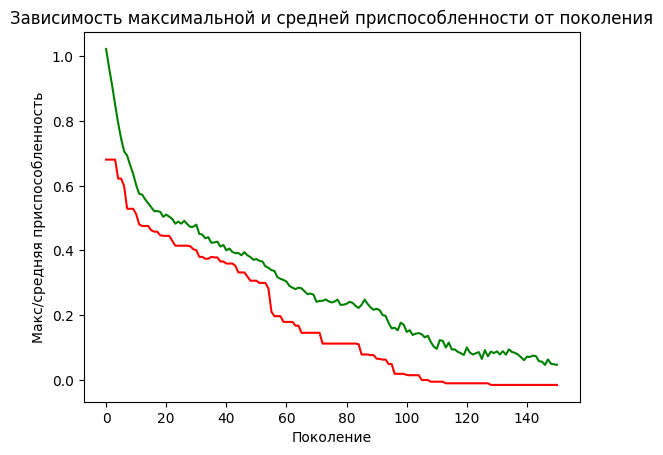

C:\Users\sholo\anaconda3\lib\site-packages\gym\envs\classic_control\mountain_car.py:171: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


In [11]:
#пример генетического алгоритма по тому,чтобы загнать машину на гору- обучение с подкреплением
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

import gym

env = gym.make('MountainCar-v0')#создание виртуального окружения

LENGTH_CHROM = 200    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 50   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 150    # максимальное количество поколений
HALL_OF_FAME_SIZE = 3

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#Генерация случаайных команд
toolbox = base.Toolbox()
toolbox.register("randomAction", random.randint, 0, 2)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomAction, LENGTH_CHROM)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

#Определение приспособленности конкретной особи
def getCarScore(individual):
    FLAG_LOCATION = 0.5
    observation = env.reset()
    actionCounter = 0

    for action in individual:
        actionCounter += 1
        step_result = env.step(action)
        observation, reward, done, info = step_result[0], step_result[1], step_result[2], step_result[3] #воздействие на объект

        if done:
            break

    if actionCounter < LENGTH_CHROM:
        score = 0 - (LENGTH_CHROM - actionCounter) / LENGTH_CHROM
    else:
        score = abs(observation[0] - FLAG_LOCATION)

    return score,


toolbox.register("evaluate", getCarScore)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=2, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)
#Отображение статистики с лучшей хромосомой
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

observation = env.reset()

for action in best:
    env.step(action)
    env.render()

env.close()


In [324]:
#Лабораторная работа 3 - алгоритм элитизма
from deap import tools
from deap.algorithms import varAnd


def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма
    """

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook


gen	nevals	min     	avg    
0  	1000  	0.077887	135.139
1  	900   	0.077887	62.2171
2  	901   	0.069348	32.7963
3  	890   	0.032433	19.7964
4  	904   	0.029025	15.7549
5  	900   	0.00800743	14.014 
6  	909   	0.00493489	14.2818
7  	885   	0.00493489	12.853 
8  	900   	0.00493489	11.4896
9  	886   	0.00493489	12.2397
10 	906   	0.000616218	12.7301
[3.004098612690486, 1.9952439348522966]


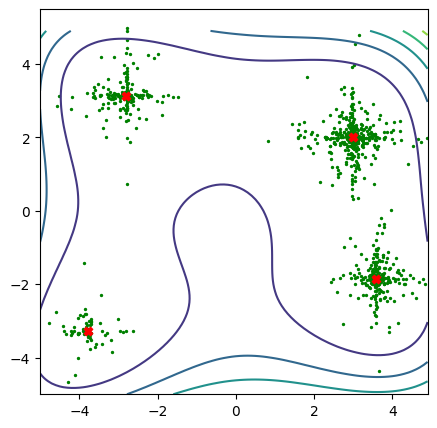

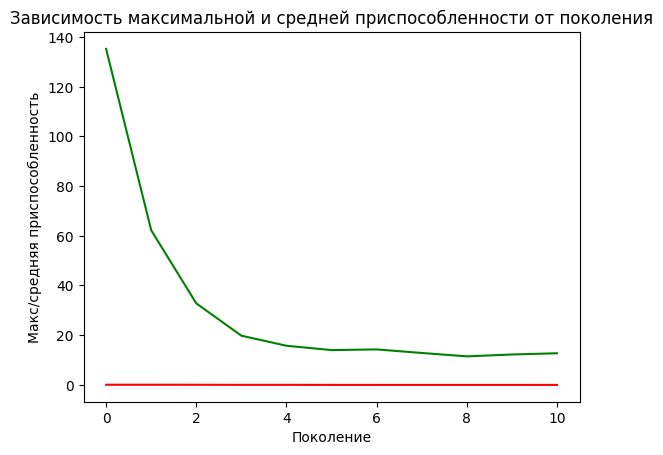

In [14]:
#функция Химмельблау
from deap import base, algorithms
from deap import creator
from deap import tools


import random
import matplotlib.pyplot as plt
import numpy as np

LOW, UP = -5, 5
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 1000   # количество индивидуумов в популяции
P_CROSSOVER = 0.02       # вероятность скрещивания
P_MUTATION = 0.9        # вероятность мутации индивидуума
MAX_GENERATIONS = 10   # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def himmelblau(individual):
    x, y = individual
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,

toolbox.register("evaluate", himmelblau)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.2)


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xgrid, ygrid = np.meshgrid(x, y)

f_himmelbalu = (xgrid**2 + ygrid - 11)**2 + (xgrid + ygrid**2 - 7)**2

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

#algelitism.eaSimpleElitism
#algorithms.eaSimple
population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_himmelbalu)),
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()



In [325]:
#Функция Eggholder - графическое представление
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*
def f(x1,x2):
    a=sqrt(fabs(x2+x1/2+47))
    b=sqrt(fabs(x1-(x2+47)))
    c=-(x2+47)*sin(a)-x1*sin(b)
    return c
x1=linspace(-512,512,100)
x2=linspace(-512,512,100)
X1,X2=meshgrid(x1,x2)
def plotter(E,A):
    fig=plt.figure(figsize=[12,8])
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,f(X1,X2),color='blue',alpha=0.7)
    ax.plot_wireframe(X1,X2,f(X1,X2),ccount=2,rcount=2, color='green',alpha=0.8)  
    ax.view_init(elev=E,azim=A)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.show()
from ipywidgets import interactive
iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
iplot

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

gen	nevals	min     	avg    
0  	200   	-938.344	12.4971
1  	182   	-938.344	-134.191
2  	177   	-938.344	-219.823
3  	186   	-938.344	-274.687
4  	184   	-938.344	-325.331
5  	181   	-938.344	-479.824
6  	183   	-938.344	-466.277
7  	183   	-952.967	-472.637
8  	184   	-952.967	-521.395
9  	181   	-952.967	-525.697
10 	183   	-956.458	-491.352
11 	179   	-956.458	-558.242
12 	178   	-956.458	-577.017
13 	174   	-956.458	-491.788
14 	185   	-956.711	-516.216
15 	187   	-956.711	-483.194
16 	184   	-956.732	-480.88 
17 	184   	-956.732	-461.585
18 	185   	-959.09 	-540.601
19 	180   	-959.09 	-499.193
20 	183   	-959.09 	-471.706
21 	177   	-959.09 	-498.102
22 	184   	-959.09 	-463.027
23 	178   	-959.262	-485.161
24 	174   	-959.262	-502.375
25 	188   	-959.262	-480.965
26 	182   	-959.262	-459.51 
27 	181   	-959.262	-447.624
28 	185   	-959.602	-520.004
29 	175   	-959.602	-563.893
30 	176   	-959.602	-580.743
31 	185   	-959.602	-565.881
32 	183   	-959.602	-522.101
33 	183   	-959.

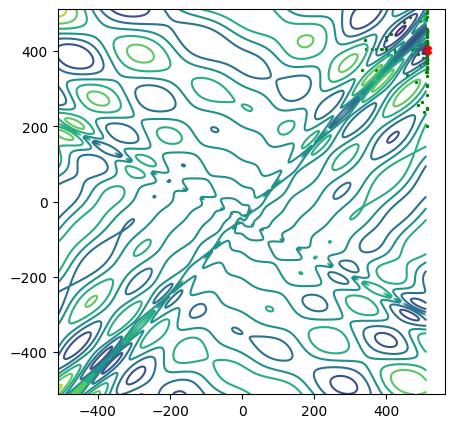

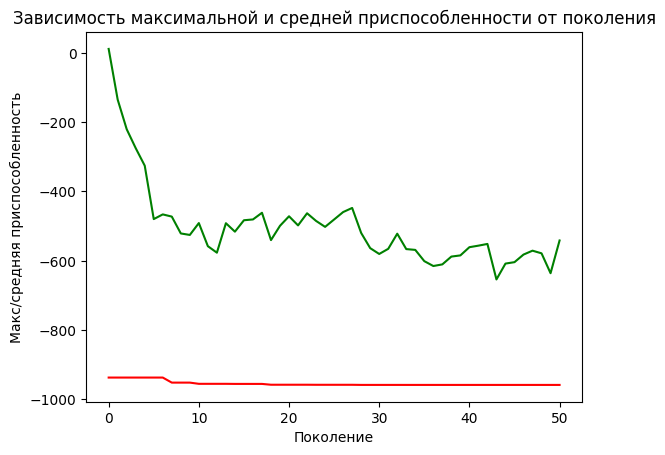

In [326]:
#Реализация аппроксимации функции Eggholder
from deap import base, algorithms
from deap import creator
from deap import tools
 
import random
import matplotlib.pyplot as plt
import numpy as np
 
LOW, UP = -512, 512
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации
 
# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.5    # вероятность скрещивания
P_MUTATION = 0.85      # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5
 
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
 
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
 
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
 
 
def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]
 
 
toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
 
population = toolbox.populationCreator(n=POPULATION_SIZE)
 
 
def eggholder(individual):
    x, y = individual
    f = -(y + 47) * np.sin(np.sqrt(abs(x / 2 + (y + 47)))) - x * np.sin(np.sqrt(abs(x - (y + 47))))
    return f,
 
toolbox.register("evaluate", eggholder)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)
 
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
 
 
import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[512, 404], ]
 
    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)
 
    plt.draw()
    plt.gcf().canvas.flush_events()
 
    #time.sleep(0.2)
 
 
x = np.arange(-512, 512, 1)
y = np.arange(-512, 512, 1)
xgrid, ygrid = np.meshgrid(x, y)
 
f_eggholder = -(ygrid + 47) * np.sin(np.sqrt(abs(xgrid / 2 + (ygrid + 47)))) - xgrid * np.sin(np.sqrt(abs(xgrid - (ygrid + 47))))
 
plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
 
ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)
 
population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_eggholder)),
                                        verbose=True)
 
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
 
best = hof.items[0]
print(best)
 
plt.ioff()
plt.show()
 
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

In [339]:
from matplotlib.lines import Line2D

vertex = ((0, 1), (1, 1), (0.5, 0.8), (0.1, 0.5), (0.8, 0.2), (0.4, 0), (0.2, 0.8))
vx = [v[0] for v in vertex]
vy = [v[1] for v in vertex]


def show_graph(ax, best):
    ax.add_line(Line2D((vertex[0][0], vertex[1][0]), (vertex[0][1], vertex[1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[2][0]), (vertex[0][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[3][0]), (vertex[0][1], vertex[3][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[1][0], vertex[2][0]), (vertex[1][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[5][0]), (vertex[2][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[4][0]), (vertex[2][1], vertex[4][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[3][0], vertex[5][0]), (vertex[3][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[4][0], vertex[5][0]), (vertex[4][1], vertex[5][1]), color='#aaa'))

    ax.add_line(Line2D((vertex[2][0], vertex[-1][0]), (vertex[2][1], vertex[-1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[-1][0]), (vertex[0][1], vertex[-1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[3][0], vertex[-1][0]), (vertex[3][1], vertex[-1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[-2][0], vertex[-1][0]), (vertex[-2][1], vertex[-1][1]), color='#aaa'))
    startV = 0
    for i, v in enumerate(best):
        if i == 0:
            continue
        prev = startV
        v = v[:v.index(i)+1]
        for j in v:
            ax.add_line(Line2D((vertex[prev][0], vertex[j][0]), (vertex[prev][1], vertex[j][1]), color='r'))
            prev = j
    ax.plot(vx, vy, ' ob', markersize=15)



gen	nevals	min	avg   
0  	500   	243	857.42
1  	75    	225	649.91
2  	57    	228	520.024
3  	83    	228	431.384
4  	67    	51 	349.488
5  	52    	51 	287.674
6  	68    	51 	252.676
7  	78    	40 	238.632
8  	67    	40 	214.424
9  	79    	40 	176.702
10 	58    	39 	108.646
11 	67    	39 	65.838 
12 	74    	29 	65.136 
13 	69    	29 	72.166 
14 	72    	29 	61.142 
15 	63    	29 	59.406 
16 	66    	29 	52.258 
17 	77    	25 	56.412 
18 	63    	25 	49.136 
19 	74    	25 	49.022 
20 	59    	25 	52.296 
21 	95    	20 	67.186 
22 	62    	20 	54.712 
23 	58    	20 	48.422 
24 	71    	17 	53.128 
25 	67    	18 	62.614 
26 	84    	18 	63.084 
27 	73    	18 	59.626 
28 	70    	18 	41.158 
29 	74    	15 	41.774 
30 	73    	15 	38.172 
[[0, 1, 4, 2, 6, 3, 5], [1, 4, 6, 0, 5, 3, 2], [2, 3, 6, 1, 5, 0, 4], [1, 3, 4, 0, 2, 5, 6], [4, 1, 0, 3, 2, 5, 6], [6, 5, 2, 0, 4, 1, 3], [6, 1, 5, 3, 2, 4, 0]]


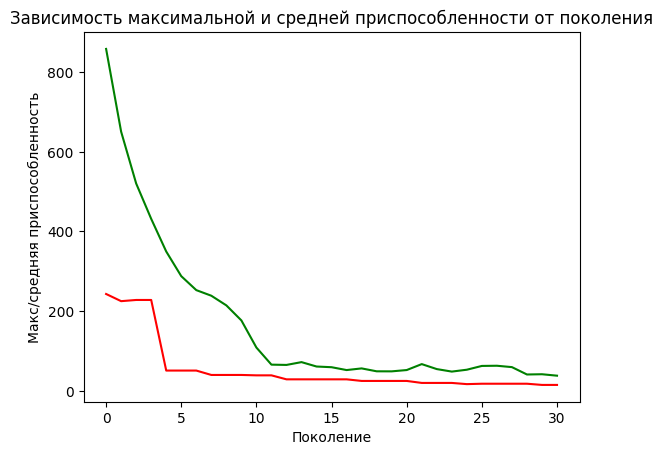

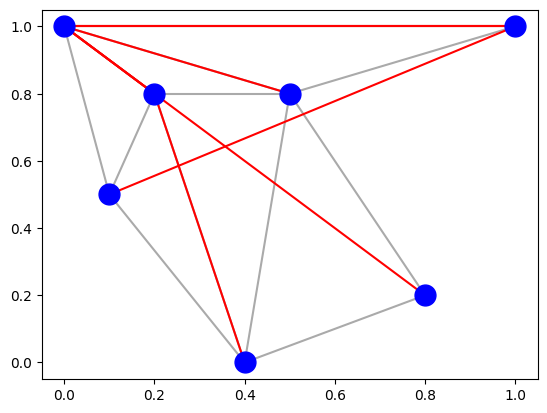

In [341]:
inf = 100
D = ((1, 2, 4, inf, 2, inf, 1),
     (5, 1, 3, 0, inf, 7, inf),
     (2, 3, 5, inf, 7, inf, 2),
     (1, 0, 2, inf, 4, 5, 7),
     (6, 4, inf, inf, 1, 5, 0),
     (2, 1, inf, 2, 5, 0, inf),
    (inf, 1, 3, 4, inf, 2, 3))

startV = 0
LENGTH_D = len(D)
LENGTH_CHROM = len(D) * len(D[0])
POPULATION_SIZE = 500
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 30
HALL_OF_FAME_SIZE = 1
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
RANDOM_SEED = 42
random.seed(RANDOM_SEED)


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
population = toolbox.populationCreator(n=POPULATION_SIZE)



def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n) + 1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,  # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,

toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0 / LENGTH_CHROM / 10)
def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n) + 1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,  # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,

toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0 / LENGTH_CHROM / 10)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


population, logbook = algorithms.eaSimple(population, toolbox,
                                           cxpb=P_CROSSOVER / LENGTH_D,
                                           mutpb=P_MUTATION / LENGTH_D,
                                           ngen=MAX_GENERATIONS,
                                           halloffame=hof,
                                           stats=stats,
                                           verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)


plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
fig, ax = plt.subplots()
show_graph(ax, best)
plt.show()

